In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Birds/birds.csv')

In [4]:
df.head()

,filepaths,labels,data set
0,train/AFRICAN CROWNED CRANE/001.jpg,AFRICAN CROWNED CRANE,train
1,train/AFRICAN CROWNED CRANE/002.jpg,AFRICAN CROWNED CRANE,train
2,train/AFRICAN CROWNED CRANE/003.jpg,AFRICAN CROWNED CRANE,train
3,train/AFRICAN CROWNED CRANE/004.jpg,AFRICAN CROWNED CRANE,train
4,train/AFRICAN CROWNED CRANE/005.jpg,AFRICAN CROWNED CRANE,train


In [5]:
df.columns
  

Index(['filepaths', 'labels', 'data set'], dtype='object')

In [6]:
testDf = df[df['data set'] == 'test']
print(testDf)

                                filepaths                   labels data set
47332    test/AFRICAN CROWNED CRANE/1.jpg    AFRICAN CROWNED CRANE     test
47333    test/AFRICAN CROWNED CRANE/2.jpg    AFRICAN CROWNED CRANE     test
47334    test/AFRICAN CROWNED CRANE/3.jpg    AFRICAN CROWNED CRANE     test
47335    test/AFRICAN CROWNED CRANE/4.jpg    AFRICAN CROWNED CRANE     test
47336    test/AFRICAN CROWNED CRANE/5.jpg    AFRICAN CROWNED CRANE     test
...                                   ...                      ...      ...
48952  test/YELLOW HEADED BLACKBIRD/1.jpg  YELLOW HEADED BLACKBIRD     test
48953  test/YELLOW HEADED BLACKBIRD/2.jpg  YELLOW HEADED BLACKBIRD     test
48954  test/YELLOW HEADED BLACKBIRD/3.jpg  YELLOW HEADED BLACKBIRD     test
48955  test/YELLOW HEADED BLACKBIRD/4.jpg  YELLOW HEADED BLACKBIRD     test
48956  test/YELLOW HEADED BLACKBIRD/5.jpg  YELLOW HEADED BLACKBIRD     test

[1625 rows x 3 columns]


In [7]:
testDf.index = range(len(testDf))
print(testDf)

                               filepaths                   labels data set
0       test/AFRICAN CROWNED CRANE/1.jpg    AFRICAN CROWNED CRANE     test
1       test/AFRICAN CROWNED CRANE/2.jpg    AFRICAN CROWNED CRANE     test
2       test/AFRICAN CROWNED CRANE/3.jpg    AFRICAN CROWNED CRANE     test
3       test/AFRICAN CROWNED CRANE/4.jpg    AFRICAN CROWNED CRANE     test
4       test/AFRICAN CROWNED CRANE/5.jpg    AFRICAN CROWNED CRANE     test
...                                  ...                      ...      ...
1620  test/YELLOW HEADED BLACKBIRD/1.jpg  YELLOW HEADED BLACKBIRD     test
1621  test/YELLOW HEADED BLACKBIRD/2.jpg  YELLOW HEADED BLACKBIRD     test
1622  test/YELLOW HEADED BLACKBIRD/3.jpg  YELLOW HEADED BLACKBIRD     test
1623  test/YELLOW HEADED BLACKBIRD/4.jpg  YELLOW HEADED BLACKBIRD     test
1624  test/YELLOW HEADED BLACKBIRD/5.jpg  YELLOW HEADED BLACKBIRD     test

[1625 rows x 3 columns]


In [8]:
import matplotlib.pyplot as plt

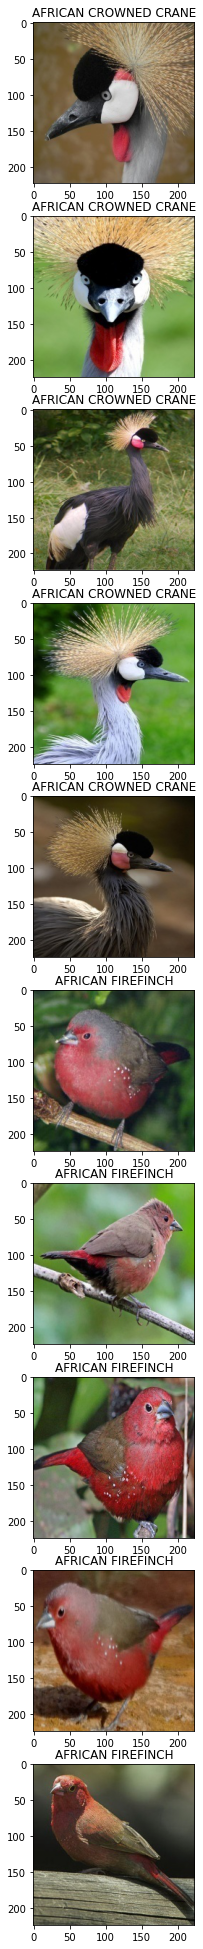

In [9]:
startPath = '/content/drive/MyDrive/DataSets/Birds/'

plt.figure(figsize=[30, 35])

for i in range(10):
  row = testDf.loc[i]
  strPath = startPath + row['filepaths']
  # print(strPath)
  img = plt.imread(strPath)
  plt.subplot(10, 1, i + 1)
  plt.imshow(img)
  plt.title(row['labels'])

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.datasets as dSet

In [ ]:
class BirdDataset(Dataset):

  def __init__(self, pathToCsv, pathRoot, nameSet):
      super().__init__()

      self.pathToCsv = pathToCsv
      buf = pd.read_csv(pathToCsv)
      self.df = buf[buf['data set'] == nameSet]
      self.df.index = range(len(self.df))
      self.pathRoot = pathRoot

  def __getitem__(self, index):
      
      sample = {}
      row = self.df.loc[index]
      sample['label'] = row['labels']
      img = plt.imread(self.pathRoot + row['filepaths'])
      sample['img'] = img
      return sample

  def __len__(self):
      return len(self.df)

In [ ]:
%debug

In [ ]:
dset = MyCastomDSet('/content/drive/MyDrive/DataSets/Birds/birds.csv', '/content/drive/MyDrive/DataSets/Birds/', 'test')

1625


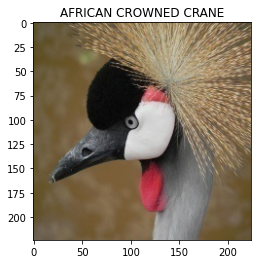

In [ ]:
sample = dset.__getitem__(0)
plt.title(sample['label'])
plt.imshow(sample['img'])
print(dset.__len__())

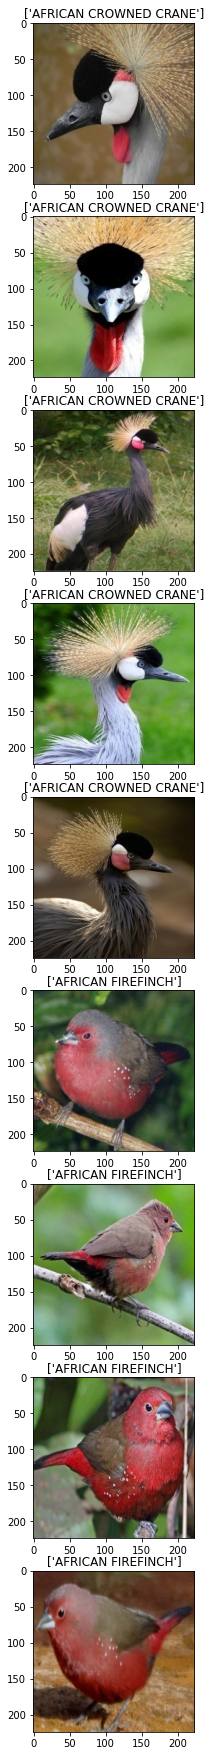

In [ ]:
dloader = DataLoader(dset, 1)
plt.figure(figsize=[30, 35])
j = 0

for sample in dloader:
    if j == 9:
      break
    j+=1

    plt.subplot(10, 1, j + 1)
    plt.imshow(sample['img'][0])
    text = sample['label']
    plt.title(text)

In [20]:
transform = T.Compose({
    T.ToTensor()
})

In [21]:
dset = dSet.ImageFolder('/content/drive/MyDrive/DataSets/Birds/train', transform=transform)

In [41]:
dset.class_to_idx
# csv даже и не нужны оказались

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALD IBIS': 17,
 'BALI STARLING': 18,
 'BALTIMORE ORIOLE': 19,
 'BANANAQUIT': 20,
 'BANDED BROADBILL': 21,
 'BANDED PITA': 22,
 'BAR-TAILED GODWIT': 23,
 'BARN OWL': 24,
 'BARN SWALLOW': 25,
 'BARRED PUFFBIRD': 26,
 'BAY-BREASTED WARBLER': 27,
 'BEARDED BARBET': 28,
 'BEARDED BELLBIRD': 29,
 'BEARDED REEDLING': 30,
 'BELTED KINGFISHER': 31,
 'BIRD OF PARADISE': 32,
 'BLACK & YELLOW bROADBILL': 33,
 'BLACK BAZA': 34,
 'BLACK FRANCOLIN': 35,
 'BLACK SKIMMER': 36,
 'BLACK SWAN': 37,
 'BLACK TAIL CRAKE': 38,
 'BLACK THROATED BUSHTIT': 39,
 'BLACK THROATED WARBLER': 40,
 'BLACK VULTURE': 41,
 'BLACK-CAP

In [17]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Birds/class_dict.csv')

In [18]:
df

,class_index,class,height,width,scale by
0,0,AFRICAN CROWNED CRANE,150,150,1
1,1,AFRICAN FIREFINCH,150,150,1
2,2,ALBATROSS,150,150,1
3,3,ALEXANDRINE PARAKEET,150,150,1
4,4,AMERICAN AVOCET,150,150,1
...,...,...,...,...,...
320,320,WILSONS BIRD OF PARADISE,150,150,1
321,321,WOOD DUCK,150,150,1
322,322,YELLOW BELLIED FLOWERPECKER,150,150,1
323,323,YELLOW CACIQUE,150,150,1


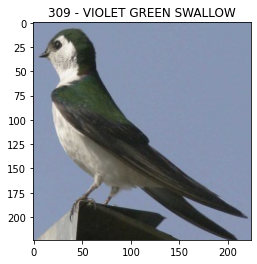

In [39]:
x, y = dset[45000]

title = df.loc[y, 'class']
plt.title(str(y) + ' - ' + title)
plt.imshow(x.permute(1, 2, 0))

In [36]:
a = df.loc[0, 'class']

In [37]:
a

'AFRICAN CROWNED CRANE'